# TATR: Using Content Analysis to Study Twitter Data
## Analyzing Twitter Tweet #GamerGate 

There are different methodologies and tactics to analyze Twitter tweets. From topic modeling to sentiment analysis. Therefore it is important for researcher to have the ability to manipulate tweets to suit their needed.

This Juypter IPython Notebook uses #GamerGate Tweets as the example data for content analysis. It will cover aspects such as tokenization of text, extracting hashtags, graphing, providing content analysis categories similar to LIWC, etc.

Note: The example data is already formatted into a CSV with all the information the IPython Notebook needs. These are the tweet text, time stamp of the tweet, and screen name.

# Import Libraries

Before we begin we are going include all the needed requirements for the notebook. You do not need to know exactly all the functionality of the libraries, however any functionality used will be explained as they appear.

Importing the required libraries for the projects. For installation instruction refer to the libraries / Jupyter home page.

In [1]:
# Importing more generic libraries
import glob
import os
import math
import csv
import ast
from collections import Counter

# Importing data structure libraries
import pandas as pd
import numpy as np

# Import graphing tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that any graphs produced appears in the notebook
%matplotlib inline

# Import text analysist tools
import re
import nltk
from nltk.tokenize import RegexpTokenizer

# Gathering the Required Information From Original Tweet CSV

The example CSV files contains a large amount of information about each tweet. From tweet texts to screen names. However we do not need all this information. For this notebook we are just going to need a few of these columns. Therefore we are going to selectively import only a select few.

From there we are also going to do some additional formatting. The reason for this is to prepare the data for analysis later on. For example we do not need to know the exact second or hour of tweets. Therefore we can remove that extra information.

## Note:
In this project I have chosen to extract all mentions and urls from the original text and replace them with "@MENTION" and "@LINK". To is done for a few reasons. Firstly it is so help with some later analysis. Second, it does not remove the original text, all it does it replace it with a placeholder in a new column. It will be discussed in the code on how to skip this process. 

Tweet text are also capitalized to make analysis easier.

# Helper Functions For Loading / Saving Files

Before we do any work, it is important that we are able to save and load our work. This is because of the modularized nature of the notebook, that being to save and load files (especially when you analysis a large corpus) is vital.

These are helper functions that help us load and save files. They each have their own use and applications. For more detail see their description in the code.

Note: Some of the code references material that is not yet used or apparent early on.

In [2]:
# Loading multiple files in a path
# This is used when all the files that you want to load are all together in a folder
# Parameters:
# path           = Path to the folder
# colSelect      = Which columns in the CSV files would you like to load
# colNames       = The names of the columns that you have selected before
# need_convert   = Check to see if we need to convert list object
# column_convert = Which columns do you need to convert
def loading_multiple_file_path(path, colSelect, colNames, need_convert=None, column_convert=None):
    
    # Load all the files
    allFiles = glob.glob(path + "/*.csv")

    # Holds all the tweets
    dataframe = pd.DataFrame()

    # Holds the individual date tweets
    dataframe= []

    # Debugs to ensure the code is working
    print("Begin reading .csv in " + path + "....\n")
    
    # Check to see if some columns need to be converted back into a list object 
    if need_convert:
        
        # Create the function to convert to a list
        string_to_list = lambda x: ast.literal_eval(str(x))

        # Create the converter that will convert all the columns we tell it to back to a list object
        conv = {}
        for entry in column_convert:
            conv[entry] = string_to_list
        
        # Read every file
        for file_ in allFiles:

            # Debugs to ensure the code is working
            print("Reading and Converting file: " + str(file_) + "....")
            df = pd.read_csv(file_,  skiprows=1, usecols=colSelect, names=colNames)

            dataframe.append(df)
    else:
        # Read every file
        for file_ in allFiles:

            # Debugs to ensure the code is working
            print("Reading file: " + str(file_) + "....")
            df = read_frame
            df = pd.read_csv(file_,  skiprows=1, usecols=colSelect, names=colNames)

            dataframe.append(df)
    
    # Debugs to ensure the code is running
    print("\nFinished reading all files in " + path + "\n")
    
    print("Merge all individual file dataframes together into a single dataframe...\n")
    dataframe = pd.concat(dataframe)
    
    print("Finished merging all the files into a single dataframe.\n" )
    
    return dataframe

# Save the dataframe into a file
# Parameters:
# data_frame_name = Name of the dataframe to save
# name_of_file    = The name of the file you want to save it as
def save_frame(data_frame_name, name_of_file):
    
    print("Begin saving dataframe into a csv.\n")
    
    name = name_of_file + ".csv"
    # Save the dataframe
    data_frame_name.to_csv(name, sep=',', encoding='utf-8')
    
    print("Finish and saved into " + name + "\n")

# Loads the dataframe from a single file. By default it skips the 1st column (this is usually the index) 
# Parameters:
# csv_file_name   = Name of the file to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
# colNames        = The names of the columns that you want to load
def read_frame(csv_file_name, length=None, custom= False, colList = None, colNames = None):
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"
    
    # Load csv by specifying which ones you want 
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList)
    # Load csv by length skipping the first one (index)
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length))
    print("Finish reading " + csv_file_name + "\n")
    return return_frame

# Similar to the one before except this converts the list present in the csv back into list objects to be used
# Parameters:
# csv_file_name   = Name of the file to load
# columnNames     = The names of the columns that you want to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
def read_frame_convert_list (csv_file_name, columnNames, length=None, custom= False, colList = None):
    
    # Create the function to convert to a list
    string_to_list = lambda x: ast.literal_eval(str(x))

    # Create the converter that will convert all the columns we tell it to back to a list object
    conv = {}
    
    # Assign the converter for each column to convert
    for entry in columnNames:
        conv[entry] = string_to_list
    
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"

    # Load a specified amount of columns from the csv
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList,  converters=conv)
    
    # Load the csv based on length
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length),  converters=conv)
    print("Finish reading " + csv_file_name + "\n")
    
    return return_frame

# Defining Format Functions

These functions below help with exacting and formatting different aspects of the tweets. This include extracting links, formatting dates, etc. 

## Note:
We save the extracted URLs and MENTIONs into their columns. Although when we save the data back into a csv it will not be a list object (it will appear as plain text). Therefore we are going to need to convert it back (hence the convert parameter in the previously made functions), and in order to do that we need to make sure that the values in these columns with list are in proper list format.

In [3]:
# Extract the links from a text
def extract_links(dataframe):
    
    # Regrex to extract all the links
    urls = re.findall(r"http\S+", dataframe['text'])
    
    # Replace the link with the placeholder @LINK
    dataframe['text'] = re.sub(r"http\S+", "@LINK", dataframe['text'])
    
    # Insert the URL into their own column
    if not urls:
        dataframe["URL"] = []
    else: 
        dataframe["URL"] = urls
    return dataframe
    
    
# Extract tweeter mentions in a text
def extract_mentions(dataframe):
    
    # Regrex to extract all the mentions
    mention = re.findall(r"@([A-Za-z0-9_]+)", dataframe['text'])
    
    # Replace the mention with the placeholder @MENTION
    dataframe['text'] = re.sub(r"@([A-Za-z0-9_]+)", "@MENTION", dataframe['text'])
    
    # Insert the mention into their own column
    if not mention:
        dataframe["MENTION"] = []
    else: 
        dataframe["MENTION"] = mention
    return dataframe

# Changes the date the declared format   
def format_date(dataframe, column_name, time_format):
    
    print("Start formatting date ")
    
    # Convert the time to date-time object
    dataframe[column_name] = pd.to_datetime(dataframe[column_name])
    
    # Convert the time to the desired format
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x.strftime(time_format))  
    
    print("Finish formatting date \n") 
    
    return dataframe

# Setting up #GamerGate Tweets

Now that we declared some helper functions we are going to load in the GamerGate tweets.

From the example CSV, I will be using columns 1,2,4. These column contain the time_stamp of the tweet, text of the tweet, and screen name.

## Note:
The analysis can take a very LONG time depending on the size of the dataset. Therefore upon finishing I saved them into a csv. This is to ensure I can load them in later and use them. If any lines regarding "saving" dataframe is commented out, it is because I have already calculated the results (just uncomment the code by removing the "//"). This also include other functions that run some form of algorithms/

In [4]:
# Start inital setup
MasterTweetFrame = loading_multiple_file_path("./Tweets", [1,2,4], ["time_stamp","text", "screen_name"])

print("Start extracting Mentions\n")

# Extract the mentions
MasterTweetFrame = MasterTweetFrame.apply(extract_mentions, axis=1)

print("End extracting Mentions\n")
print("Start extracting URL\n")

# Extract the URLS
MasterTweetFrame = MasterTweetFrame.apply(extract_links, axis=1)

print("End Extracting URL\n")

# Format the date to use have year, month, day
MasterTweetFrame = format_date(MasterTweetFrame, "time_stamp", "%Y-%m-%d")

Begin reading .csv in ./Tweets....

Reading file: ./Tweets/datesorted-2016-08-04.csv....
Reading file: ./Tweets/datesorted-2016-10-27.csv....
Reading file: ./Tweets/datesorted-2016-09-15.csv....
Reading file: ./Tweets/datesorted-2016-12-22.csv....
Reading file: ./Tweets/datesorted-2016-12-08.csv....
Reading file: ./Tweets/datesorted-2016-10-20.csv....
Reading file: ./Tweets/datesorted-2016-12-01.csv....
Reading file: ./Tweets/datesorted-2016-10-06.csv....
Reading file: ./Tweets/datesorted-2016-08-18.csv....
Reading file: ./Tweets/datesorted-2016-11-24.csv....
Reading file: ./Tweets/datesorted-2016-11-17.csv....
Reading file: ./Tweets/datesorted-2016-09-29.csv....
Reading file: ./Tweets/datesorted-2016-12-15.csv....
Reading file: ./Tweets/datesorted-2016-09-08.csv....
Reading file: ./Tweets/datesorted-2016-11-10.csv....
Reading file: ./Tweets/datesorted-2016-12-29-shortweek.csv....
Reading file: ./Tweets/datesorted-2016-08-25.csv....
Reading file: ./Tweets/datesorted-2016-09-01.csv....


In [6]:
# See first 5 entry of MasterTweetFrame
MasterTweetFrame[:5]

,time_stamp,text,screen_name,MENTION,URL
0,2016-08-04,"TOTALLY UNRELATED TO #GAMERGATE, THERE IS ONLY...",oh_my_gg_ebooks,[],[]
1,2016-08-04,"Every morning at Konami, fuck you guys we let ...",reribot,[],[]
2,2016-08-04,"Come, come, come play the game #gamergate",gaming_for_kids,[],[]
3,2016-08-04,#GamerGate\nI told you these vidya gaem journo...,Contragamer911,[],[https://t.co/GzJpcimy7e]
4,2016-08-04,@LINK #gamergate&gt;mobs r good if they serve ...,Ash_Knight0,[],"[https://t.co/ulfnGFAeFF, https://t.co/4GFXQr2..."


# CheckPoint Save and Load (MasterTweetFrame)

Now that we finished formatting MasterTweetFrame from the csv, we are going to save it and load it back (to prove that it saved correctly, feel free to start or stop at this point). 

## Note: 
To verify the loaded dataframe is the same as the previous one, match the first 5 entries printed before the save with those after the load.

# Basic Characteristic of Tweets

With a complete list of all the tweets formatted and saved into a dataframe (MasterTweetFrame), it is time to look at some characteristics of it.

In [7]:
# Find out how many unique exist in the dataset for each type
print("There are " + str(len(MasterTweetFrame.time_stamp)) + " tweets recorded in the dataset")
print("There are " + str(len(MasterTweetFrame.time_stamp.unique())) + " days recorded in the dataset")
print("There are " + str(len(MasterTweetFrame.screen_name.unique())) + " usernames in the dataset")

There are 90495 tweets recorded in the dataset
There are 150 days recorded in the dataset
There are 8859 usernames in the dataset


# Tweet Basic Statistic

Now that we have a Master dataframe with the original formatted data. Now we are going to create a new dataframe to store some statistic about the MasterTweetFrame.

## Note: 
We are going use a feature called "groupby". This is a feature of dataframe that allow us to categorize a dataframe based on a column. In this example we are going to use it on "time_stamp".

In [8]:
# Create a new dataframe to hold the statistic and we are going to group them by day and count
TweetBasicStatistic = MasterTweetFrame.groupby("time_stamp").count()

# Rename the columns to reflect what we have done
TweetBasicStatistic.columns = ["text_count", "screen_name_count","URL_count","MENTION_count"]

# See how the first 5 entry in the dataframe look like
TweetBasicStatistic[:5]

,text_count,screen_name_count,URL_count,MENTION_count
time_stamp,,,,
2016-08-04,516,516,516,516
2016-08-05,524,524,524,524
2016-08-06,452,452,452,452
2016-08-07,743,743,743,743
2016-08-08,628,628,628,628


# CheckPoint Save and Load (TweetBasicStatistic)

We save and reload the dataframe to ensure the data is saved and we can reuse it.

## Note:
This is slightly a bit different than the MasterTweetFrame. This is because "time_stamp" is an index not a column in this dataframe. Therefore before we save we are going to turn the index into a column. Afterwards when we load it back, we will return it back to being an index fort the dataframe. The reason for this is because the load function for the csvs skips the index when loading. (This can be changed by editing the load function. Afterwards make the appropriate changes to later code to address this change)

In [9]:
# Convert the time_stamp back into a column
TweetBasicStatistic = TweetBasicStatistic.reset_index()

# Save the dataframe
save_frame(TweetBasicStatistic, "TweetBasicStatistic")
    
# Load the dataframe from csv
TweetBasicStatistic = read_frame("TweetBasicStatistic", 6)

# Convert the column time_stamp back to an index
TweetBasicStatistic = TweetBasicStatistic.set_index("time_stamp")

# Check to see if the top 5 entry are correct
TweetBasicStatistic[:5]

Begin saving dataframe into a csv.

Finish and saved into TweetBasicStatistic.csv

Reading csv TweetBasicStatistic
Finish reading TweetBasicStatistic



,text_count,screen_name_count,URL_count,MENTION_count
time_stamp,,,,
2016-08-04,516,516,516,516
2016-08-05,524,524,524,524
2016-08-06,452,452,452,452
2016-08-07,743,743,743,743
2016-08-08,628,628,628,628


# Graphing Functions

Now that we have done some basic analysis of the tweet text. It is time to create some functions that help us graph the results. Here we declare 2 extra parameter to save the graph if needed. These do not have to be used. There will be example of both chooisng to save the graph created or not choosing to.

## Note: 
The titles are hard coded for the example dataset used. In order to change it simply change the line with "fig.suptitle" with a new title.

In [10]:
# Plot a column value over time 
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def basic_plot_generator(column, date, dataframe, intervalValue = 1, saveImage=False, fileName = None):
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Set title for the graph
    fig.suptitle("GamerGate " + column + " Over Time", fontsize="x-large")

    # Create subplot of Tweet Count over time using a the default 1 month interval
    ax.plot(pd.to_datetime(date), dataframe[column], label=column)

    # Set the interval to be the default 1 month 
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=intervalValue))
    
    # Set the date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Calculate the average
    countMean = [dataframe[column].mean()]*len(pd.to_datetime(date))
    mean_line = ax.plot(pd.to_datetime(date),countMean, label='Average Overall Count', linestyle='--')

    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

# Plot different columns against eachother over time
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def plot_compare_generator(column, date, dataframe, intervalValue = 1, saveImage=False, fileName = None):
    
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Generate Title
    title = "Comparing GamerGate Sentiements: "

    # Add all columns to the title
    for element in column:
        title = title + " " + element 
    
    title = title + " Over time"
    
    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")
    
    for element in column:
        # Create subplot of Tweet Count over time using a 3 month interval
        ax.plot(pd.to_datetime(date), dataframe[element], label=element)
        
    # Set the interval to be default 1 month 
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=intervalValue))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

# Plotting TweetBasicStatistic

Now that we declared some graphing functions it is time to use them.

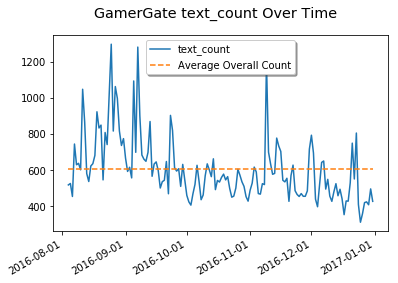

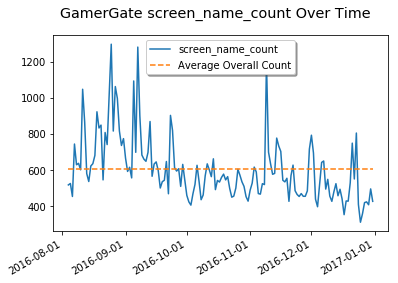

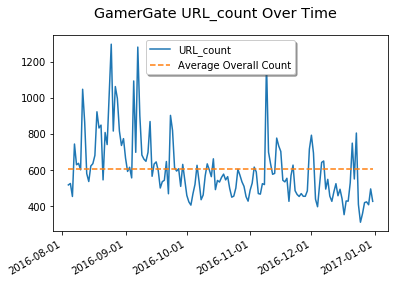

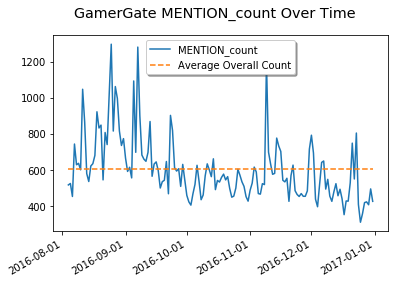

In [11]:
# Plot each category as well as their corresponding averages
for columns in TweetBasicStatistic:
    # This is an example of not choosing to save the image
    basic_plot_generator(columns, TweetBasicStatistic.index, TweetBasicStatistic)

# Advance Analysis Helper Function

In order to conduct different types of text analysis we are going break up the text into 'tokens'. This just refers to separate each word in a tweet. Therefore we are going to create a new dataframe that contained tokened sentences (separate via sentences) and words (separated by word) and their respective token count. This is done using nltk library.

In [12]:
# Calculate sentence length
def tokenize_text(dataframe):
    # Calculate number of sentences
    sentence = nltk.sent_tokenize(dataframe["text"]) 
    dataframe['sentence'] = sentence
    dataframe['num_sentence'] = len(sentence)
    
    # Calculate length of sentences
    sentence_length = []
    tokens = []
    for line in sentence:
        
        # Set tokenizer to reconize words + the shorthand @MENTION and @LINK
        tokenizer = RegexpTokenizer(r'\w+|@[A-Za-z0-9_-]*')
        words = tokenizer.tokenize(line)
        
        # Add the amount of tokens to the list 
        tokens = tokens + words
        sentence_length.append(len(words))

    # Calculate average sentence length
    dataframe['average_sentence_length'] = math.ceil(sum(sentence_length)/len(sentence_length))
        
    # Save Tokenized text
    dataframe['tokens'] = tokens
    
    # Save Token Count
    dataframe['count_tokens'] = len(tokens)
    
    return dataframe

# Advance Analysis Segmentation

Given that some dataset can be very large and the amount of time it takes to run an algorthmn over such as large dataset. It is important to have the ability to break larger dataset into smaller chuncks. Although this does not neccessarily speed up the process, it allows us to insert debugs to track our progress. In addition, it also allows us to restart from a segement if there is a crash rather than restart from the beginning. 

At this time we are also going to save completed chunks into their own csv. This is to ensure our progress is not lost. We can load them all back in because we have a function that can read multiple files from a file that was created at the start of the notebook. 

## Note: 
This function below allows the user to select which alogrithm to use. Therefore if there exist an algorithm that is not in this notebook, you can easily add it in. All that is needed is to add another condition in the for loop with a new algorithm and another number to represent it.

Some of the algorithms will make more sense/explained later on in the notebook

In [13]:
# Section off the tweets into smaller chuncks and save it into csv
# Parameters:
# size            = The size of each segement of the data (if given the total size of the dataframe, it will be 1 file)
# Frame           = The dataframe to look at
# Filename        = The name of the csv (a numbering will be attached to the end of the name)
# algorithm       = The algorithm that is being chosen
# savedirectory   = The folder name to save the csv
def create_save_section(size, Frame, Filename, algorithm, savedirectory):
    
    # Create the file directory if it does not exist
    if not os.path.exists(savedirectory):
        os.makedirs(savedirectory)
    
    # Divide the dataframe into smaller chunk to work with
    # Set size of each chunk
    n = size

    #Create a list of the frame section
    FrameList = [Frame[i:i+n] for i in range(0,Frame.shape[0],n)]
    
    # Iterate through each section in the list
    for section in range(0,len(FrameList)):
        
        # Use the corresponding algorithm
        # if you want to add a new one this is where it is done
        if algorithm == 1:
            # Print debug and tokenize the text
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(tokenize_text, axis=1)
            print("Finish looking at section: " + str(section+1))
        
        if algorithm == 2:
            # Print debug and extract hashtag from dataframe
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(extract_hashtag, axis=1)
            print("Finish looking at section: " + str(section+1))
            
        if algorithm == 3:
            # Print debug and update the dictionary of categories
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(update_values_category, axis=1)
            print("Finish looking at section: " + str(section+1))
        
        # Create the name of the save location based on file and directory
        saveLocation = "./" + savedirectory + "/" + Filename 
        
        # Print debug and save the section into a csv
        print("Saving the section: " + str(section+1) + " into csv")
        newFrame.to_csv(saveLocation + "_" + str(section+1) + ".csv", sep=',', encoding='utf-8')
        print("Finish saving into " + saveLocation + "_" + str(section+1) + ".csv")
    
    print("Finised saving all the files into " + saveLocation)

# Generating Segmented Tokenized Tweets

We now move onto the next segment of the notebook about how to tokenize tweets. In the section we are again going to create a new dataframe to hold all this information. To begin we will copy over some columns from MasterTweetFrame.

Afterwards we will move onto tokenizing the tweets based on words and sentences. T Depending on the size of the dataset, the reason for support both methods is due to the fact that, depending on your needs, both aspect may be important. However depending on the amount of text in the corpus his may take a large amount of time. Therefore we will be conducting this tokenization in parts using the function "create_save_section" made eariler.

## Note:
The helper function "create_save_section" does not return us a dataframe to use, it merely just saves it. Therefore we will need to load the files back in.

In [14]:
# Copy the columns we want into new dataframe
TokenTweetFrame = MasterTweetFrame[['time_stamp','text']].copy()

# Tokenize and Save the Tweets (each section has 10000 entries) 
# 1 refers to algorithm 1 in the create_save_frame (to tokenize text)
create_save_section(10000, TokenTweetFrame, "TokenTweet", 1, "Tweets_Tokenize")

# Loading the csvs into a dataframe
# Since all the csv are located in "Tweets_Tokenize we can just load from there
TokenTweetFrame = loading_multiple_file_path("./Tweets_Tokenize", [1,2,3,4,5,6,7], ["time_stamp","text","sentence","num_sentence","average_sentence_length","tokens","count_tokens"])

Looking at section: 1
Finish looking at section: 1
Saving the section: 1 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_1.csv
Looking at section: 2
Finish looking at section: 2
Saving the section: 2 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_2.csv
Looking at section: 3
Finish looking at section: 3
Saving the section: 3 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_3.csv
Looking at section: 4
Finish looking at section: 4
Saving the section: 4 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_4.csv
Looking at section: 5
Finish looking at section: 5
Saving the section: 5 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_5.csv
Looking at section: 6
Finish looking at section: 6
Saving the section: 6 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_6.csv
Looking at section: 7
Finish looking at section: 7
Saving the section: 7 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_7.csv
Looking at section: 8
Finish looking at section:

# Examining TokenTweetsFrame

Now that we have the TokenTweets dataframe loaded back into the dataframe. We will a look at the dataframe itself as well as some properties of it.

In [15]:
# Look at the first 5 entries of TokenTweet
TokenTweetFrame[:5]

,time_stamp,text,sentence,num_sentence,average_sentence_length,tokens,count_tokens
0,2016-11-18,"@LINK #GamerGate [SOCJUS] Sweden opens ""manspl...","['@LINK #GamerGate [SOCJUS] Sweden opens ""mans...",1,7,"['@LINK', 'GamerGate', 'SOCJUS', 'Sweden', 'op...",7
1,2016-11-18,Are games causing violence? Anyone who has wor...,"['Are games causing violence?', 'Anyone who ha...",2,11,"['Are', 'games', 'causing', 'violence', 'Anyon...",21
2,2016-11-18,Whats old is new again. #GamerGate @LINK,"['Whats old is new again.', '#GamerGate @LINK']",2,4,"['Whats', 'old', 'is', 'new', 'again', 'GamerG...",7
3,2016-11-18,THE\nMAXIMUM\nTRUMP\n\n@LINK\n\n#gamergate #sa...,['THE\nMAXIMUM\nTRUMP\n\n@LINK\n\n#gamergate #...,1,11,"['THE', 'MAXIMUM', 'TRUMP', '@LINK', 'gamergat...",11
4,2016-11-18,Your life #gamergate,['Your life #gamergate'],1,3,"['Your', 'life', 'gamergate']",3


In [16]:
# Find out how many unique exist in the dataset
print("There is an average of " + str(TokenTweetFrame["num_sentence"].mean()) + " sentences in the dataset")
print("The overall average sentence length per tweet is " + str(TokenTweetFrame["average_sentence_length"].mean()))

There is an average of 1.5850378473948836 sentences in the dataset
The overall average sentence length per tweet is 9.847560638709322


# Calculating Overall Averages

Although we have number of sentences and average sentence length for each tweet, we might want the average of these statistic for each day. Therefore we are going to create a new dataframe with these values to use. We will also include in this new dataframe the number of words in the tweets

In [17]:
# Convert the column time_stamp back to an index
TokenTweetFrame = TokenTweetFrame.set_index("time_stamp")

# Resort the index (This is because we read from Mulitple Files)
TokenTweetFrame.sort_index(inplace=True)

# Calculate average on num_sentence, averaege_sentence_length and group by time_stamp
TokenGraphFrame = TokenTweetFrame[['num_sentence','average_sentence_length','count_tokens']].copy()

# Calculate average per day and save them into their own dataframe for graphing
TokenGraphFrame = TokenGraphFrame[['num_sentence','average_sentence_length','count_tokens']].groupby(["time_stamp"]).mean()

# See what the first 5 entry look likes of token graph
TokenGraphFrame[:5]

,num_sentence,average_sentence_length,count_tokens
time_stamp,,,
2016-08-04,1.622093,9.614341,13.323643
2016-08-05,1.620229,9.973282,13.721374
2016-08-06,1.696903,9.807522,13.865044
2016-08-07,1.672948,10.091521,14.212651
2016-08-08,1.710191,10.108280,14.632166


# Graphing TokenTweetFrame

Now we are going to graph both the number of tweets and the average sentence length over time. Before we can accomplish this we need to set the time_stamp column back to being an index.

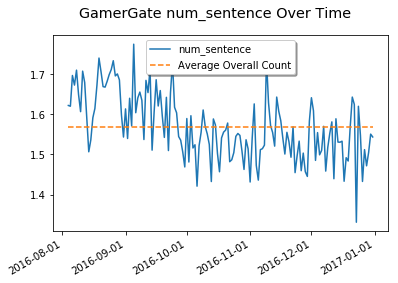

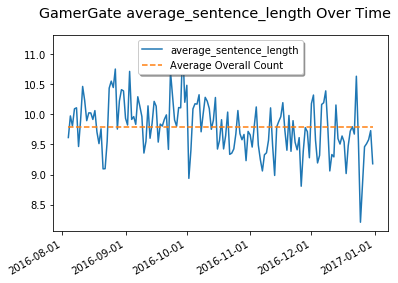

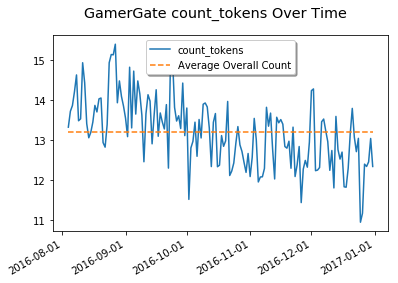

In [18]:
# Using the graph function we made we will plot these averages
for columns in TokenGraphFrame[["num_sentence", "average_sentence_length","count_tokens"]]:
    basic_plot_generator(columns, TokenGraphFrame.index, TokenGraphFrame)

# CheckPoint Save and Load (TokenGraphFrame)

Now that we calculated some basic stylistic on the tweets we are going to save the work we have done into a csv.

## Note:
The reason for not having a checkpoint for the previous dataframe (TokenTweetFrame) is because the information is already saved into a csv upon creation. Therefore all the data can just be loaded back in and therefore the need for a singular file to hold the information of the multiple files created is just extra redundancy. If you do wish to save it into a singular file, use the "save_frame" function and give it "TokenTweetFrame"

In [19]:
# Convert the time_stamp into a column
TokenGraphFrame = TokenGraphFrame.reset_index()

# Save the dataframe
save_frame(TokenGraphFrame, "TokenGraphFrame")
    
# Load the dataframe from csv
TokenGraphFrame = read_frame("TokenGraphFrame", 5)

# Convert the column time_stamp back to an index
TokenGraphFrame = TokenGraphFrame.set_index("time_stamp")

Begin saving dataframe into a csv.

Finish and saved into TokenGraphFrame.csv

Reading csv TokenGraphFrame
Finish reading TokenGraphFrame



# Examining HASHTAGS

We will now move onto examining HASHTAGS. Before we can begin we are going to define a function that helps us extract hashtags from the tokenized text.

## Note: 
In this notebook we are removing the "#gamergate" from analysis. This is because all tweets gathered had this hashtag, therefore we want to know all the other hashtags used and how many there were of them. This includes removing duplicates of the "gamegate" hashtag. If you would rather keep it in or chose to remove your own chosen hashtag it can be done here. 

In addition it is important to recall that all hashtags are stored in capital letters

In [24]:
# Extract out the hashtags and count how many there are
def extract_hashtag(dataframe):
    
    # Finds all the hashtags with regrex and capitalize them with ".upper()"
    hashtag = re.findall(r"#(\w+)", dataframe["text"].upper())

    # Remove all instances GAMERGATE hashtag (since all tweets has it) This includes duplicates
    # If you would like to keep them comment out the while loop
    # If you would like to remove a different hashtag you can copy the following two lines and change the word
    # Remember all tokens are capitalized
    while "GAMERGATE" in hashtag:
        hashtag.remove("GAMERGATE")

    # Insert hashtag and count into dataframe
    if hashtag:
        dataframe['HASHTAG'] = hashtag
        dataframe['count_hashtag'] = len(hashtag)
    else:
        dataframe['HASHTAG'] = []
        dataframe['count_hashtag'] = 0
        
    return dataframe

# Extracting Hashtag and Gathering Statistics

Before we begin we are yet again going to copy over parts of MasterTweetFrame into a new dataframe. Afterwards we will extract the hashtag from it, however depending on the dataset this may take a while. Therefore it is safer to do the calculation in parts (again we will use create_save_section to do so). 

## Note: 
All hashtags are recorded in capitals. This is to simplify some aspects for analysis later on when we examine the occurance of each hashtag.

In [25]:
# Create new dataframe with information we need from MasterTweetFrame
HashtagStatisticFrame = MasterTweetFrame[['time_stamp','text']].copy()

# Create sections using the extract hashtag
create_save_section(10000,HashtagStatisticFrame , "HashtagStatistic", 2, "Hashtag_Stat")

# Load back the csv (Note the files are saved in a folder)
HashtagStatisticFrame = loading_multiple_file_path("./Hashtag_Stat", [1,2,3,4], ["time_stamp","text","HASHTAG","count_hashtag"])

# Convert the column time_stamp to an index
HashtagStatisticFrame = HashtagStatisticFrame.set_index("time_stamp")

Looking at section: 1
Finish looking at section: 1
Saving the section: 1 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_1.csv
Looking at section: 2
Finish looking at section: 2
Saving the section: 2 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_2.csv
Looking at section: 3
Finish looking at section: 3
Saving the section: 3 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_3.csv
Looking at section: 4
Finish looking at section: 4
Saving the section: 4 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_4.csv
Looking at section: 5
Finish looking at section: 5
Saving the section: 5 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_5.csv
Looking at section: 6
Finish looking at section: 6
Saving the section: 6 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_6.csv
Looking at section: 7
Finish looking at section: 7
Saving the section: 7 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_7.csv
Looking at section: 8
Finis

# Plotting Hashtag Graph

Simialr to before, we are going to graph some results.

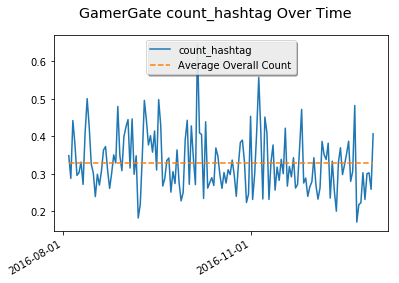

In [26]:
# Using the graph function we made we will plot these averages
HashtagGraphFrame = HashtagStatisticFrame.groupby(["time_stamp"]).mean()

for columns in HashtagGraphFrame[["count_hashtag"]]:
    basic_plot_generator(columns, HashtagGraphFrame.index, HashtagGraphFrame, intervalValue=3)

# Popular Hashtag 

We now are going to move onto examining popular hashtags. To do so we fight are going to define a simple function that can get us the occurance of a particular hashtag.

In [27]:
# Helper function that calculates what hashtag appear the most
def get_max_word(dataframe):
    
    # Calculates what is most popular
    popular = max(set(dataframe["HASHTAG"]), key=dataframe["HASHTAG"].count)
    
    # Assigns the values
    dataframe["most_popular"] = popular
    
    return dataframe

# Most Popular Hashtag

Now that we have the hashtags in a dataframe, let's create a dateframe that looks into how popular a particular hashtag is. This is done by first collapsing the dates together and combining the hashtag list. Afterwards count how many of each hashtag are there. However getting the occurrence of a hashtag for each tweet does not provide a lot of useful information, therefore we will collapse the tweets by date and get the most popular ones by date

## Note:

It is important to know that during this process we save and load back the dataframe after we made a copy of it. The reason for this is because HashtagStatisticFrame column "HASHTAG" are stored in a "string" that so happens to look like a python "list". Therefore we need the dataframe to re-evaluate this column to be a "list" and not a "string". One method to do so is to use the functioned created called "read_frame_convert_list" which would 1. reads the file (which the data of HashtagStatisticFrame is stored as) and 2. read the "HASHTAG" column as a "list". 


In [53]:
# Create a new dataframe with just HASHTAG and count
HashtagPopularFrame = HashtagStatisticFrame[["HASHTAG","count_hashtag"]].copy()

# Unset time_stamp to save
HashtagPopularFrame = HashtagPopularFrame.reset_index()

# Save Frame
save_frame(HashtagPopularFrame, "HashtagPopularFrame")

# Load back the Frame except run it under the covnerter to get a list not object
HashtagPopularFrame = read_frame_convert_list("HashtagPopularFrame", ["HASHTAG"], length = 4)

# Reset index back to date
HashtagPopularFrame = HashtagPopularFrame.set_index("time_stamp")

# Collapsing the dataframe Hashtags and Count
HashtagPopularFrame = HashtagPopularFrame[["HASHTAG","count_hashtag"]].groupby('time_stamp').agg({'HASHTAG': 'sum', 'count_hashtag': 'sum'})

# See what the first 5 results looks like
HashtagPopularFrame[:5]

Begin saving dataframe into a csv.

Finish and saved into HashtagPopularFrame.csv

Reading csv HashtagPopularFrame
Finish reading HashtagPopularFrame



,HASHTAG,count_hashtag
time_stamp,,
2016-08-04,"[GG16, FEMINISMISCANCER, OPSKYNET, AUGLIVESMAT...",180
2016-08-05,"[AMERICA, IMWITHHER, TRUMPPENCE16, DONALDTRUMP...",151
2016-08-06,"[JAYZ, FEMINISTS, FEMINIST, INFOWARS, 4CHAN, A...",200
2016-08-07,"[ONMYTWITTERRESUME, MEGALIA4, KILLSTREAM, SJW,...",283
2016-08-08,"[BLM, FEMINISM, BIBLE, KINGDAVID, JOAB, TRUMP2...",186


# Finding the Most Popular Hashtag

Before we look into the most popular Hashtag we can collapse all the HASHTAGS in one date together and get the count. Then afterwards find the most popular hashtag in each date and see how it does over the whole period.

In [54]:
# Now lets save the top most popular word by day into their own column
HashtagPopularFrame = HashtagPopularFrame.apply(lambda x: get_max_word(x), axis = 1)

# Print out the first 5 entry
HashtagPopularFrame[:5]

,HASHTAG,count_hashtag,most_popular
time_stamp,,,
2016-08-04,"[GG16, FEMINISMISCANCER, OPSKYNET, AUGLIVESMAT...",180,OPSKYNET
2016-08-05,"[AMERICA, IMWITHHER, TRUMPPENCE16, DONALDTRUMP...",151,NOTYOURSHIELD
2016-08-06,"[JAYZ, FEMINISTS, FEMINIST, INFOWARS, 4CHAN, A...",200,GAMING
2016-08-07,"[ONMYTWITTERRESUME, MEGALIA4, KILLSTREAM, SJW,...",283,FREEMILO
2016-08-08,"[BLM, FEMINISM, BIBLE, KINGDAVID, JOAB, TRUMP2...",186,OPSKYNET


# CheckPoint Save and Load (HashtagPopularFrame)

This is just to save the work currently done into its own file. 

## Note:
Another reason for creating a save point here is because in the next section we will looking at occurance of hashtags. This involves editing this dataframe, therefore having a "blank" dataframe to be reused is useful.

In [ ]:
# Reset Index
HashtagPopularFrame = HashtagPopularFrame.reset_index()

# Save Frame
save_frame(HashtagPopularFrame, "HashtagPopularFrame")

# Load back the Frame except run it under the covnerter to get a list not object
HashtagPopularFrame = read_frame_convert_list("HashtagPopularFrame", ["HASHTAG"], length = 5)

# Set Index
HashtagPopularFrame = HashtagPopularFrame.set_index("time_stamp")

# Occurance of Hashtag

Using the information gathered from HashtagPopularFrame we can see that "NOTYOURSHIELD" seems to be a popular hashtag. Therefore lets see how popular it was over time, this is done by counting its occurance over time. Therefore we are going to need a function that will help us accomplish this.

In [30]:
# Counts the occurance of a word
def countOccurance(dateframe, word):
    # Count the amount of hashtag in the list
    count = Counter(dateframe["HASHTAG"])
    title = "count_" + word
    dateframe[title] = count[word]
    return dateframe

# Calculating Occurance of "NOTYOURSHIELD"

To do this we will apply the previously created function to the dataframe looking for "NOTYOURSHIELD". Therefore if we want to see other hashtags over time we can just run the algorthmn agian with a different hashtag.

In [31]:
# Acquire count of "NOTYOURSHIELD"
HashtagPopularFrame = HashtagPopularFrame.apply(lambda x: countOccurance(x, "NOTYOURSHIELD"), axis = 1)

# Show the first 5
HashtagPopularFrame[:5]

,HASHTAG,count_hashtag,most_popular,count_NOTYOURSHIELD
time_stamp,,,,
2016-08-04,"[GG16, FEMINISMISCANCER, OPSKYNET, AUGLIVESMAT...",180,OPSKYNET,8
2016-08-05,"[AMERICA, IMWITHHER, TRUMPPENCE16, DONALDTRUMP...",151,NOTYOURSHIELD,9
2016-08-06,"[JAYZ, FEMINISTS, FEMINIST, INFOWARS, 4CHAN, A...",200,GAMING,4
2016-08-07,"[ONMYTWITTERRESUME, MEGALIA4, KILLSTREAM, SJW,...",283,FREEMILO,7
2016-08-08,"[BLM, FEMINISM, BIBLE, KINGDAVID, JOAB, TRUMP2...",186,OPSKYNET,5


# Graphing the HASHTAG

Now that we had occurance of "NOTYOURSHIELD" we are going to graph it over time.

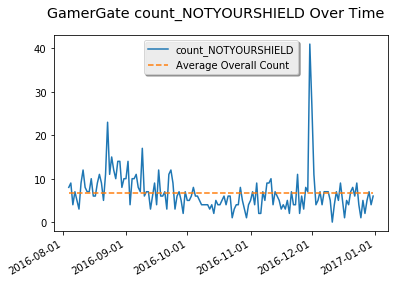

In [32]:
# Using the graph function we made we will plot these averages
for columns in HashtagPopularFrame[["count_NOTYOURSHIELD"]]:
    # Example of saving the file
    basic_plot_generator(columns, HashtagPopularFrame.index, HashtagPopularFrame, saveImage=True, fileName="count_NOTYOURSHIELD")

# Content Analysis

We have looked at both hashtags, word count, and other factors. Now we are going to look at content analysis. In this notebook the following code mimics the functionalities of LIWC (Lingustic Inquiry Word Count). This type of analysis pairs words with different categories (Postive, Negative, etc) and counts how many time a text fits into them. 

This requires a dictionary of words and categories. These can be found here 
http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm

With the dictionary and the token count (or word count) we can divide the number found in a particular category and the total token count of the tweet to get a percentage.

## Note:
I collapsed some of the aspects of the spreadsheet. This is because in the original there are multiple definition of a word. I have choosen to treat the all instances of the same word as the same and fused together their related categories. 

Therefore I have only kept the categories and nothing else in this notebook.

# Loading the Words and Categories

First we are going to load the csv files (provided at the site above) and convert it to a dictionary. This allows us to do a much faster search on the list to fill a dataframe later on. 

In [33]:
# The csv name of the inquirer dictionary
csvFile = "inquirerbasic.csv"

# Create a list of rows to hold the values
listOfRows = []

# Reading the csv 
with open(csvFile, 'r') as file: # This makes sure that file is closed after reading
    data = csv.reader(file)
    
    # For every row in the fie save it
    for row in data:
        listOfRows.append(row)

# Close the file
file.closed

# Format the category
categories = listOfRows[0]

# We do not need the first 2 category (they have the word, and the source of it)
# The last two columns are description of the words in question. We also do not need that
# Note the csv also as additional 4 empty columns at the end (that is why we have -6)
categories = categories[2:len(categories)-6]

# Check on how many categories
print("Length of category " + str(len(categories)))

# Print out the first 5 categories
print(categories[:5])

Length of category 182
['Positiv', 'Negativ', 'Pstv', 'Affil', 'Ngtv']


# Helper Functions

Before we can simulate LIWC, we are going to need to define helper functions that deals with column managements, keeping track of counts, and so forth.

In [58]:
# Set all the categories of a word into a set if that word did not exist already
def new_attribute_set(row):
    # The reason for a set because it is faster to laod
    attributeSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            attributeSet.add(element)
    return attributeSet;

# Combine with pre-existing set with any new additions
def combine_attribute_set(row, oldset):
    # The reason for a set because it is faster to laod
    newSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            newSet.add(element)
    
    # Return a new updated set without duplicates
    return (oldset | newSet)

# Assign every word with the categories (in a set)
def get_dictionary_list(listOfRows,categories):
    returnDict = {}

    # For every row create the set of categories that belong to it
    for row in listOfRows:
        
        # Reduce the word to the base. This is because the csv has LOVE#1, LOVE#2 to symbolize different meanings
        # In this anaylsis we can going to collapse them together
        word = row[0].split("#", 1)[0]
    
        # Check to see if the word is in the dictionary already
        if word in returnDict:
            returnDict[word] = combine_attribute_set(row[2:len(categories)-2], returnDict[word])
        else:
            returnDict[word] = new_attribute_set(row[2:len(categories)-2])
        
    return returnDict

# Creates the columns we need and fills them with how many of each categories the text belongs to
def update_values_category(dataframe):
    # Finds and counts all the categories it belongs to
    resultDictionary = find_category(dataframe["tokens"])
    # Iterate through the results
    for k, v in resultDictionary.items():
        # Create columns for every category
        dataframe[k] = v
    return dataframe

# Looks through the tokens and increments the appropriate categories that it belongs to
def find_category(tokens):
    # Set all categories to 0 as default
    tweetCategories = {el:0 for el in categories}
    # Iterate through all tokens
    for element in tokens:
        # If it exist increment the value
        if element.upper() in dictWords:
            inside = dictWords[element.upper()]
    
            # Increment the category
            for element in inside:
                tweetCategories[element] += 1
    
    return tweetCategories

# Creating the Catgories Dataframe

Now that we have the categories we can now move onto creating a new dataframe that has all these categories listed. To do so we will be copying over a few columns from TokenTweetFrame (we do not need all of it).

Important note. When you are loading the csv into a panda it does not load the exact object type back. For example we saved 'tokens' as a list. However when we load it back it is not in that exact type. Therefore one method to do this is when we read the csv we run a converter. This would transform it back into the object type we want. It is also sometimes faster to save the frame and reload it with the converter when we need it (no point in converting it if we are not going to use it).

In [64]:
# Copy the 3 columns we need
# Note since TokenTweetFrame had "time_stamp" as an index we are going to need to reset it before
# we can copy it over
CategoryTweetFrame = TokenTweetFrame.reset_index()[['time_stamp','tokens','count_tokens']].copy()

# Saving the file away
save_frame(CategoryTweetFrame, "CategoryTweetFrame")

# Read the csv using the made function that deals with converting and covert "tokens" column
CategoryTweetFrame = read_frame_convert_list("CategoryTweetFrame", ['tokens'], length=4)

# Set index 
CategoryTweetFrame = CategoryTweetFrame.set_index("time_stamp")

# See first 5 entries
CategoryTweetFrame[:5]

Begin saving dataframe into a csv.

Finish and saved into CategoryTweetFrame.csv

Reading csv CategoryTweetFrame
Finish reading CategoryTweetFrame



,tokens,count_tokens
time_stamp,,
2016-08-04,"[GamerGate, didn, t, help, my, career, at, all...",24
2016-08-04,"[egalitarianism, gamergate]",2
2016-08-04,"[@LINK, GamerGate, Gaming, Polygon, doesn, t, ...",12
2016-08-04,"[@LINK, GamerGate, Discussion, Are, the, old, ...",21
2016-08-04,"[LIVE, NOW, Doxing, What, is, Public, Vs, Priv...",19


# Creating the Dictionary of Categories

Now we are going to need to create the dictionary for the categories. 

In [60]:
# Create dictionary of words which category they belong to
dictWords = get_dictionary_list(listOfRows[1:], categories)

# Have a look at the dictionary
dictWords

{'ABIDE': {'Active', 'Affil', 'Doctrin', 'IAV', 'Positiv'},
 'ABILITY': {'ABS', 'Abs@', 'EVAL', 'MeansLw', 'Positiv', 'Strong', 'Virtue'},
 'ABLE': {'EVAL', 'MeansLw', 'Positiv', 'Pstv', 'Strong', 'Virtue'},
 'ABOUND': {'IAV', 'Increas', 'Passive', 'Positiv'},
 'ABSOLVE': {'Active', 'ComForm', 'IAV', 'Positiv', 'SocRel'},
 'ABSORBENT': {'Increas', 'IndAdj', 'Positiv'},
 'ABSORPTION': {'Affil', 'Increas', 'Positiv'},
 'ABUNDANCE': {'ECON',
  'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ABUNDANT': {'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ACCEDE': {'Active',
  'Affil',
  'ComForm',
  'IAV',
  'Positiv',
  'PowGain',
  'PowTot'},
 'ACCENTUATE': {'Active', 'IAV', 'Ovrst', 'Positiv'},
 'ACCEPT': {'IAV', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel', 'Submit'},
 'ACCEPTABLE': {'EVAL', 'PosAff', 'Positiv', 'Pstv', 'Virtue'},
 'ACCEPTANCE': {'Affil', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel'},
 'ACCESSIBLE': 

# Calculating the Category Amount.

Now that we have the data frame it is time to count how many of the words in the tweet belong to each category. However to calculate this for every single entry is very time intensive. Therefore we are going to collapse the entries by date and then calculate the algorthmn. 

## Note:
The matching is done with token and categories words all capitalized. This is to help speed up and simplifies the edge cases for the analysis. 

Depending on how large you dataset is, you could calculate the categories for each individual tweet. In order to do this simply comment out the first line in the code below.

In [65]:
# Collapsing the tokens by time_stamp (in this case by day)
# the agg specifies what to do with the other columns, in this case sum them up
CategoryTweetFrame = CategoryTweetFrame[["tokens", "count_tokens"]].groupby('time_stamp').agg({'tokens': 'sum', 'count_tokens':'sum'})

# Create save files as we calculate categories
create_save_section(100,CategoryTweetFrame , "CategoryTweetFrameSum", 3, "Tweet_Category")

# Load back the csvs (we don't need to convert the tokens again since we are done calculating)
# In this case since we are going to graph the results we are going to load them into a new dataframe
CategoryTweetFrame = loading_multiple_file_path("./Tweet_Category", list(range(0, len(["time_stamp","tokens","count_tokens"] + categories))), ["time_stamp","tokens","count_tokens"] + categories)

# Set the index
CategoryTweetFrame = CategoryTweetFrame.set_index("time_stamp")

# Resort the index (This is because we read from Mulitple Files)
CategoryTweetFrame.sort_index(inplace=True)

# Find the top category of each day as well
CategoryTweetFrame["top_category"] = CategoryTweetFrame.iloc[:,2:].idxmax(axis=1)

# See first 5 results
CategoryTweetFrame[:5]

Looking at section: 1
Finish looking at section: 1
Saving the section: 1 into csv
Finish saving into ./Tweet_Category/CategoryTweetFrameSum_1.csv
Looking at section: 2
Finish looking at section: 2
Saving the section: 2 into csv
Finish saving into ./Tweet_Category/CategoryTweetFrameSum_2.csv
Finised saving all the files into ./Tweet_Category/CategoryTweetFrameSum
Begin reading .csv in ./Tweet_Category....

Reading file: ./Tweet_Category/CategoryTweetFrameSum_2.csv....
Reading file: ./Tweet_Category/CategoryTweetFrameSum_1.csv....

Finished reading all files in ./Tweet_Category

Merge all individual file dataframes together into a single dataframe...

Finished merging all the files into a single dataframe.



,tokens,count_tokens,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,top_category
time_stamp,,,,,,,,,,,,,,,,,,,,,
2016-08-04,"['GamerGate', 'didn', 't', 'help', 'my', 'care...",6875,390,272,366,189,229,164,464,182,...,7,0,49,71,156,0,0,0,0,IAV
2016-08-05,"['Sigh', 'time', 'to', 'beat', 'the', 'dead', ...",7190,387,302,363,201,251,206,478,219,...,14,1,44,85,127,0,0,0,0,IAV
2016-08-06,"['@LINK', 'GamerGate', 'Because', 'most', 'of'...",6267,309,241,295,171,200,161,405,188,...,17,2,48,75,140,0,0,0,0,IAV
2016-08-07,"['@LINK', 'GamerGate', 'Gamers', 'Resurrected'...",10560,520,442,488,246,373,286,700,314,...,14,2,82,104,242,0,0,0,0,IAV
2016-08-08,"['The', 'GamerGate', 'word', 'for', 'today', '...",9189,478,396,455,250,332,233,630,300,...,13,0,70,90,219,0,0,0,0,IAV


# Plotting the Results

Now that we have the amount of each category for every tweet sorted by date. We can now graph it to see the overall change during this period of time. For starters lets plot both the postive and negative percent amounts. You can switch out the categories for any you prefer.

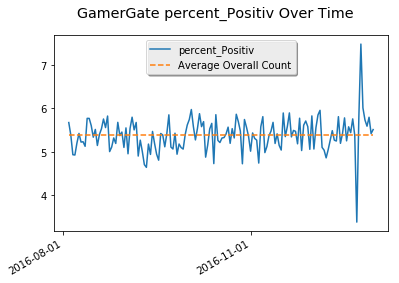

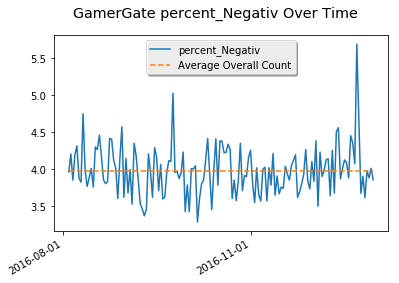

In [47]:
# Save over the columns we want
CategoryTweetGraphFrame = CategoryTweetFrame[["count_tokens","Positiv","Negativ"]].copy()

# Calulate percent of Positiv and Negativ when compared to total amount of tokens that day
# This is done by dividing the category amount with total amount of tweet (*100 to get a percent)
CategoryTweetGraphFrame["percent_Positiv"] = (CategoryTweetGraphFrame["Positiv"] / CategoryTweetGraphFrame["count_tokens"]) * 100
CategoryTweetGraphFrame["percent_Negativ"] = (CategoryTweetGraphFrame["Negativ"] / CategoryTweetGraphFrame["count_tokens"]) * 100

# Plotting both the postive and negative category percentage
for columns in CategoryTweetGraphFrame[["percent_Positiv", "percent_Negativ"]]:
    basic_plot_generator(columns, CategoryTweetGraphFrame.index, CategoryTweetGraphFrame, intervalValue= 3)

# Plotting Different Categories Against Each Other

Although we have previously only plotted one category, it is possible to graph multiple graphs against each other to see how different categories evolve over time.

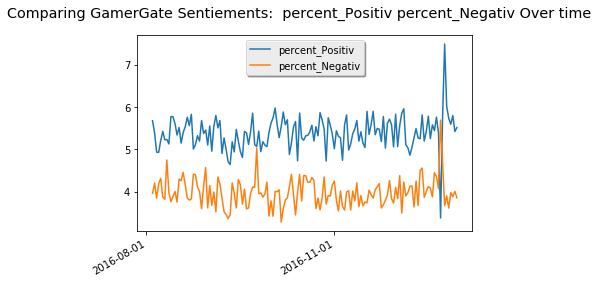

In [48]:
# Ploting Negativ and Postiv against one another in the same graph
plot_compare_generator(['percent_Positiv', 'percent_Negativ'], CategoryTweetGraphFrame.index, CategoryTweetGraphFrame, intervalValue= 3, saveImage=True, fileName="Pos_Neg_Compare")

# Conclusion

In this IPython Notebook we went over a wide varity of data manipulation and analysis. From tokenizing the text, word count, extracting hashtag and content analysis.

This IPython Notebook provides a foundation for future research. It also written in a modular format to allow for easy code modification to adapt this IPython Notebook to fit other datasets. Although some aspect are exclusive to the example dataset (column names), all the functionality had been purposely made generic to be transferable for other use (MasterTweetFrame is a generic name).

There are some limitations to the notebook itself. The biggest being the assumption made to simplify case handling and other factors. other smaller ones are the the fact that all tokens are capitalized. Depending on the context of the word or sentence this may take away meaning. Therefore there is heavy documentation on the functions used and created throughout the notebook to better communicate the possible area of improve / modifications if so desired. 